In [4]:

pip install seaborn 

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


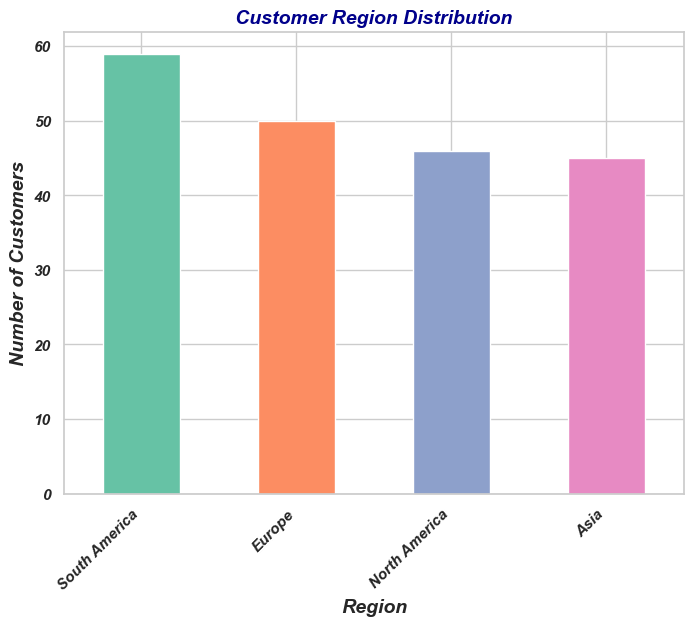

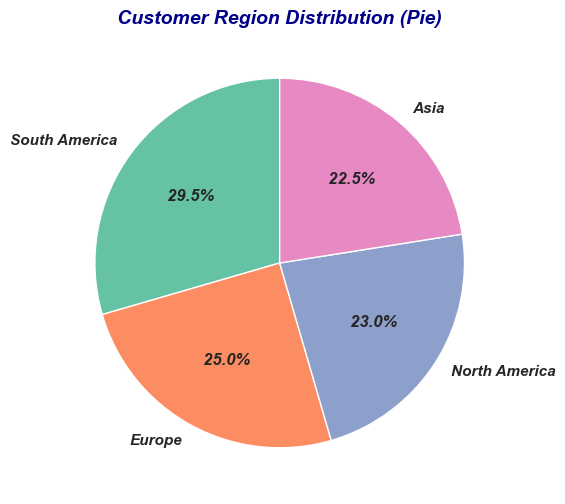

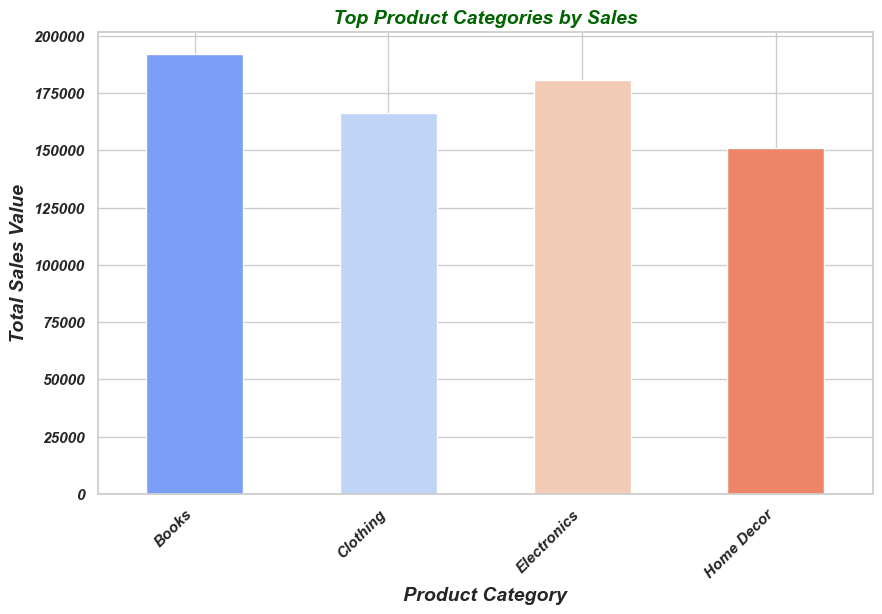

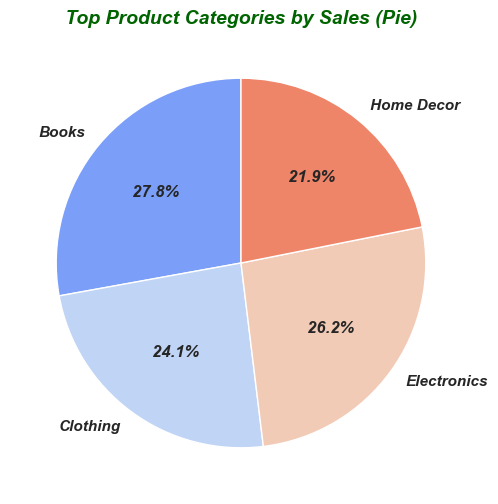

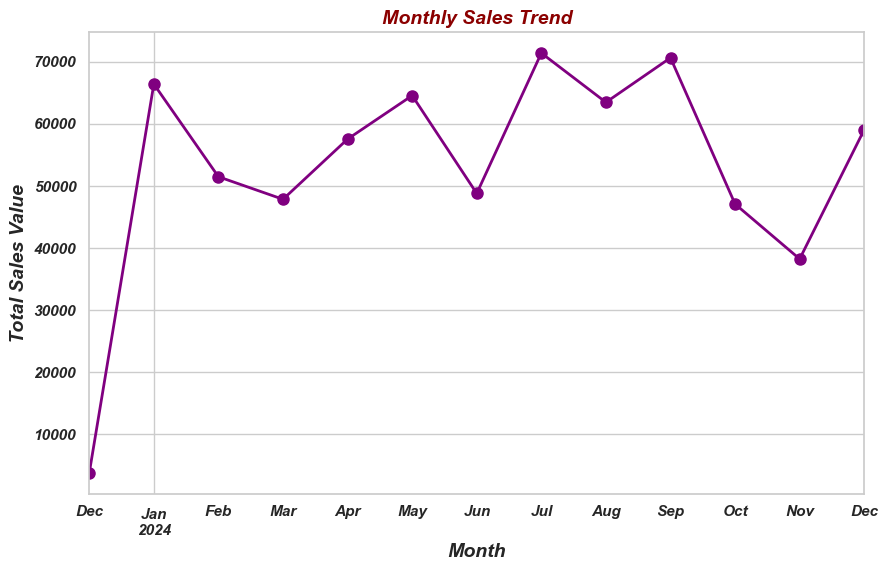

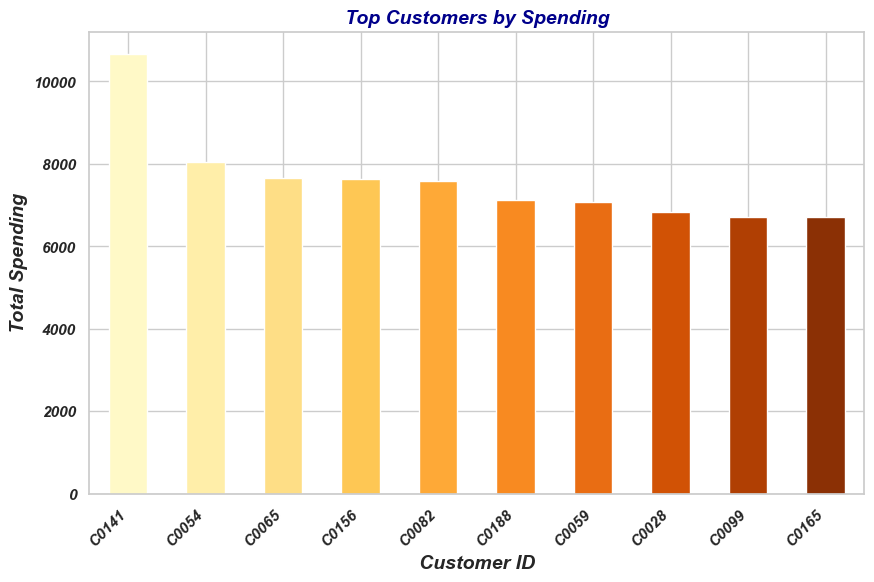

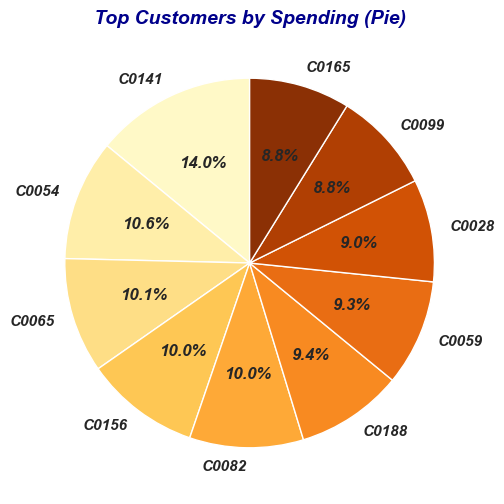

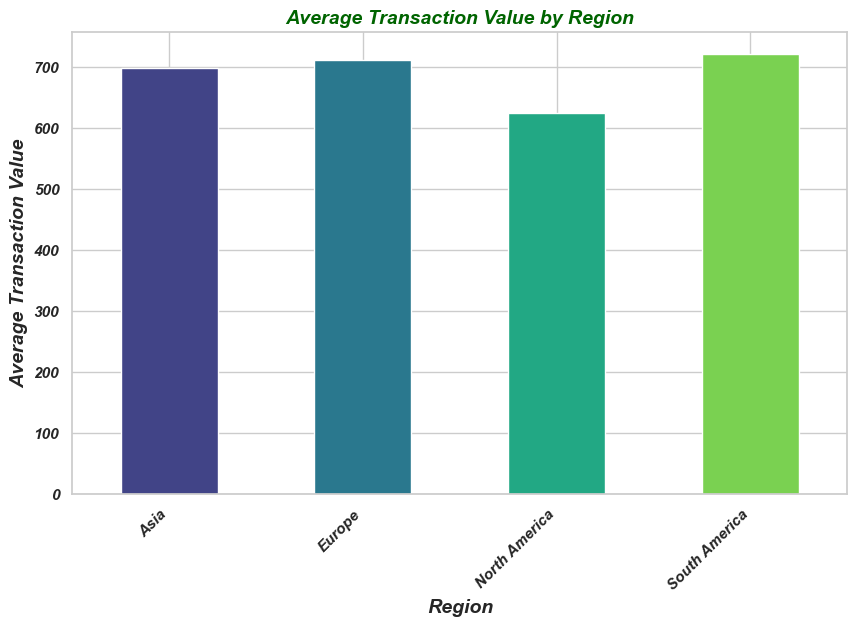

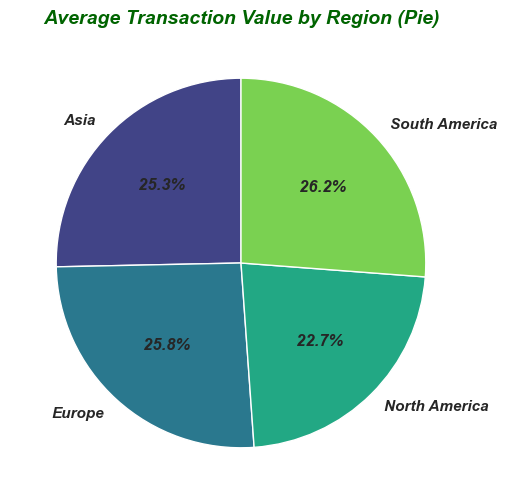

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font style to Times New Roman, italic, bold, and size 14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.weight'] = 'bold'

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load datasets
customers = pd.read_csv("Customers.csv")  # Load customer data
products = pd.read_csv("Products.csv")    # Load product data
transactions = pd.read_csv("Transactions.csv")  # Load transaction data

# Data Cleaning
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])  # Convert signup date to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])  # Convert transaction date to datetime

# Example Analysis and Visualizations

# 1. Customer Region Distribution
region_dist = customers['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_dist.plot(kind='bar', color=sns.color_palette("Set2", len(region_dist)))
plt.xlabel('Region', fontsize=14, fontweight='bold', style='italic')
plt.ylabel('Number of Customers', fontsize=14, fontweight='bold', style='italic')
plt.title('Customer Region Distribution', fontsize=14, fontweight='bold', style='italic', color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pie chart for Customer Region Distribution
plt.figure(figsize=(8, 6))
region_dist.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2", len(region_dist)), startangle=90)
plt.title('Customer Region Distribution (Pie)', fontsize=14, fontweight='bold', style='italic', color='darkblue')
plt.ylabel('')  # Hides the y-axis label
plt.show()

# 2. Top Product Categories by Sales
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color=sns.color_palette("coolwarm", len(category_sales)))
plt.xlabel('Product Category', fontsize=14, fontweight='bold', style='italic')
plt.ylabel('Total Sales Value', fontsize=14, fontweight='bold', style='italic')
plt.title('Top Product Categories by Sales', fontsize=14, fontweight='bold', style='italic', color='darkgreen')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pie chart for Product Categories Sales
plt.figure(figsize=(8, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(category_sales)), startangle=90)
plt.title('Top Product Categories by Sales (Pie)', fontsize=14, fontweight='bold', style='italic', color='darkgreen')
plt.ylabel('')  # Hides the y-axis label
plt.show()

# 3. Monthly Sales Trend
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='purple', linewidth=2, markersize=8)
plt.xlabel('Month', fontsize=14, fontweight='bold', style='italic')
plt.ylabel('Total Sales Value', fontsize=14, fontweight='bold', style='italic')
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold', style='italic', color='darkred')
plt.grid(True)
plt.show()

# 4. Top Customers by Total Spending
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color=sns.color_palette("YlOrBr", len(top_customers)))
plt.xlabel('Customer ID', fontsize=14, fontweight='bold', style='italic')
plt.ylabel('Total Spending', fontsize=14, fontweight='bold', style='italic')
plt.title('Top Customers by Spending', fontsize=14, fontweight='bold', style='italic', color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pie chart for Top Customers by Spending
plt.figure(figsize=(8, 6))
top_customers.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("YlOrBr", len(top_customers)), startangle=90)
plt.title('Top Customers by Spending (Pie)', fontsize=14, fontweight='bold', style='italic', color='darkblue')
plt.ylabel('')  # Hides the y-axis label
plt.show()

# 5. Average Transaction Value by Region
transactions_with_customers = transactions.merge(customers, on='CustomerID')
region_avg_transaction = transactions_with_customers.groupby('Region')['TotalValue'].mean()

plt.figure(figsize=(10, 6))
region_avg_transaction.plot(kind='bar', color=sns.color_palette("viridis", len(region_avg_transaction)))
plt.xlabel('Region', fontsize=14, fontweight='bold', style='italic')
plt.ylabel('Average Transaction Value', fontsize=14, fontweight='bold', style='italic')
plt.title('Average Transaction Value by Region', fontsize=14, fontweight='bold', style='italic', color='darkgreen')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pie chart for Average Transaction Value by Region
plt.figure(figsize=(8, 6))
region_avg_transaction.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("viridis", len(region_avg_transaction)), startangle=90)
plt.title('Average Transaction Value by Region (Pie)', fontsize=14, fontweight='bold', style='italic', color='darkgreen')
plt.ylabel('')  # Hides the y-axis label
plt.show()
